<a href="https://colab.research.google.com/github/ethankyle360/ML4SupplyChain/blob/main/SC_Logistics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supply Chain Logistics Analysis
Goal: I need to make sure that I deliver the products to the customers without overstocking and keeping the costs as low as possible while getting the product delivered on time.

In [1]:
import pandas as pd
from google.colab import files # Use file upload feature to upload Excel file

# Store Excel file inside variable `file_path`
file_path = 'Supply chain logistics problem.xlsx'

In [2]:
# Load the Excel file into separate Pandas DataFrames for each sheet
# Read the specific sheet I want to read from the Excel file and store it into a separate DataFrame
order_list_df = pd.read_excel(file_path, sheet_name='OrderList')
freight_rates_df = pd.read_excel(file_path, sheet_name='FreightRates')
wh_costs_df = pd.read_excel(file_path, sheet_name='WhCosts')
wh_capacities_df = pd.read_excel(file_path, sheet_name='WhCapacities')
products_per_plant_df = pd.read_excel(file_path, sheet_name='ProductsPerPlant')
vmi_customers_df = pd.read_excel(file_path, sheet_name='VmiCustomers')
plant_ports_df = pd.read_excel(file_path, sheet_name='PlantPorts')

## Display first rows for each DataFrame

In [3]:
# Display the first few rows of each DataFrame to verify successful loading
print("OrderList DataFrame:")
print(order_list_df.head())

print("\nFreightRates DataFrame:")
print(freight_rates_df.head())

print("\nWarehouse Costs DataFrame:")
print(wh_costs_df.head())

print("\nWarehouse Capacities DataFrame:")
print(wh_capacities_df.head())

print("\nProducts Per Plant DataFrame:")
print(products_per_plant_df.head())

print("\nVMI Customers DataFrame:")
print(vmi_customers_df.head())

print("\nPlant Ports DataFrame:")
print(plant_ports_df.head())

OrderList DataFrame:
       Order ID Order Date Origin Port Carrier  TPT Service Level  \
0  1.447296e+09 2013-05-26      PORT09   V44_3    1           CRF   
1  1.447158e+09 2013-05-26      PORT09   V44_3    1           CRF   
2  1.447139e+09 2013-05-26      PORT09   V44_3    1           CRF   
3  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   
4  1.447364e+09 2013-05-26      PORT09   V44_3    1           CRF   

   Ship ahead day count  Ship Late Day count   Customer  Product ID  \
0                     3                    0  V55555_53     1700106   
1                     3                    0  V55555_53     1700106   
2                     3                    0  V55555_53     1700106   
3                     3                    0  V55555_53     1700106   
4                     3                    0  V55555_53     1700106   

  Plant Code Destination Port  Unit quantity  Weight  
0    PLANT16           PORT09            808   14.30  
1    PLANT16           PORT

## Explore each DataFrame structure

In [4]:
import numpy as np

# Explore the structure of each DataFrame
dataframes = {
    "OrderList": order_list_df,
    "FreightRates": freight_rates_df,
    "WarehouseCosts": wh_costs_df,
    "WarehouseCapacities": wh_capacities_df,
    "ProductsPerPlant": products_per_plant_df,
    "VMICustomers": vmi_customers_df,
    "PlantPorts": plant_ports_df
}

## Check for missing values

In [5]:
# Go through each item in the `dataframes` dictionary that we created earlier
for name, df in dataframes.items():
    print(f"{name} - Data Types:")
    print(df.dtypes) # Return a Series with the data type of each column
    print(f"\n{name} - Missing Values:")
    print(df.isnull().sum()) # Print the # of missing columns from each DataFrame
    print("\n")

OrderList - Data Types:
Order ID                       float64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object

OrderList - Missing Values:
Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64


FreightR

## Summarize key statistics for numerical columns

In [6]:
# Loop through each item in the `dataframes` dictionary
for name, df in dataframes.items():
    # Take only the columns with numerical datatypes and create a new DataFrame
    # Check if the new DataFrame is not empty (has numerical datatypes)
    if not df.select_dtypes(include=[np.number]).empty:
        print(f"{name} - Statistics for Numerical Data:")
        # Select only numerical columns and provide a summary of the columns (mean, std, min, max)
        print(df.select_dtypes(include=[np.number]).describe())
        print("\n")

OrderList - Statistics for Numerical Data:
           Order ID          TPT  Ship ahead day count  Ship Late Day count  \
count  9.215000e+03  9215.000000           9215.000000          9215.000000   
mean   1.447274e+09     1.717743              1.852306             0.039935   
std    8.381629e+04     0.630500              1.922302             0.319625   
min    1.447126e+09     0.000000              0.000000             0.000000   
25%    1.447197e+09     1.000000              0.000000             0.000000   
50%    1.447276e+09     2.000000              3.000000             0.000000   
75%    1.447346e+09     2.000000              3.000000             0.000000   
max    1.447425e+09     4.000000              6.000000             6.000000   

         Product ID  Unit quantity       Weight  
count  9.215000e+03    9215.000000  9215.000000  
mean   1.680536e+06    3202.747151    19.871688  
std    1.526593e+04   15965.622260    66.569064  
min    1.613321e+06     235.000000     0.0000

## Summarize key statistics for categorical columns

In [7]:
# Loop through each item in the `dataframes` dictionary
for name, df in dataframes.items():
    # Select columns with categorical datatypes and create a new DataFrame
    # Proceed if the DataFrame is not empty (has columns with categorical datatypes)
    if not df.select_dtypes(include=['object']).empty:
        print(f"{name} - Statistics for Categorical Data:")
        # Create a summary for the categorical columns (count, unique values, mode frequent value)
        print(df.select_dtypes(include=['object']).describe())
        print("\n")

OrderList - Statistics for Categorical Data:
       Origin Port Carrier Service Level           Customer Plant Code  \
count         9215    9215          9215               9215       9215   
unique           3       3             3                 46          7   
top         PORT04  V444_0           DTP  V55555555555555_8    PLANT03   
freq          9041    6264          6218                976       8541   

       Destination Port  
count              9215  
unique                1  
top              PORT09  
freq               9215  


FreightRates - Statistics for Categorical Data:
       Carrier orig_port_cd dest_port_cd svc_cd mode_dsc  Carrier type
count     1540         1540         1540   1540     1540          1540
unique       9           10            1      2        2             2
top     V444_4       PORT06       PORT09    DTD   AIR     V888888883_1
freq       906          479         1540   1322     1511          1198


WarehouseCosts - Statistics for Categorical Dat

## Why are we doing numerical and categorical columns separately?
By separating our columns into numerical and categorical, we can apply the appropriate statistical methods to each type of data, ensuring that the analysis is both accurate and meaningful.

E.g
1. Numerical columns (mean, median, standard deviation, minimum, and maximum values)
2. Categorical columns (count of unique values, the most frequent value (mode), and frequency of the most frequent value)

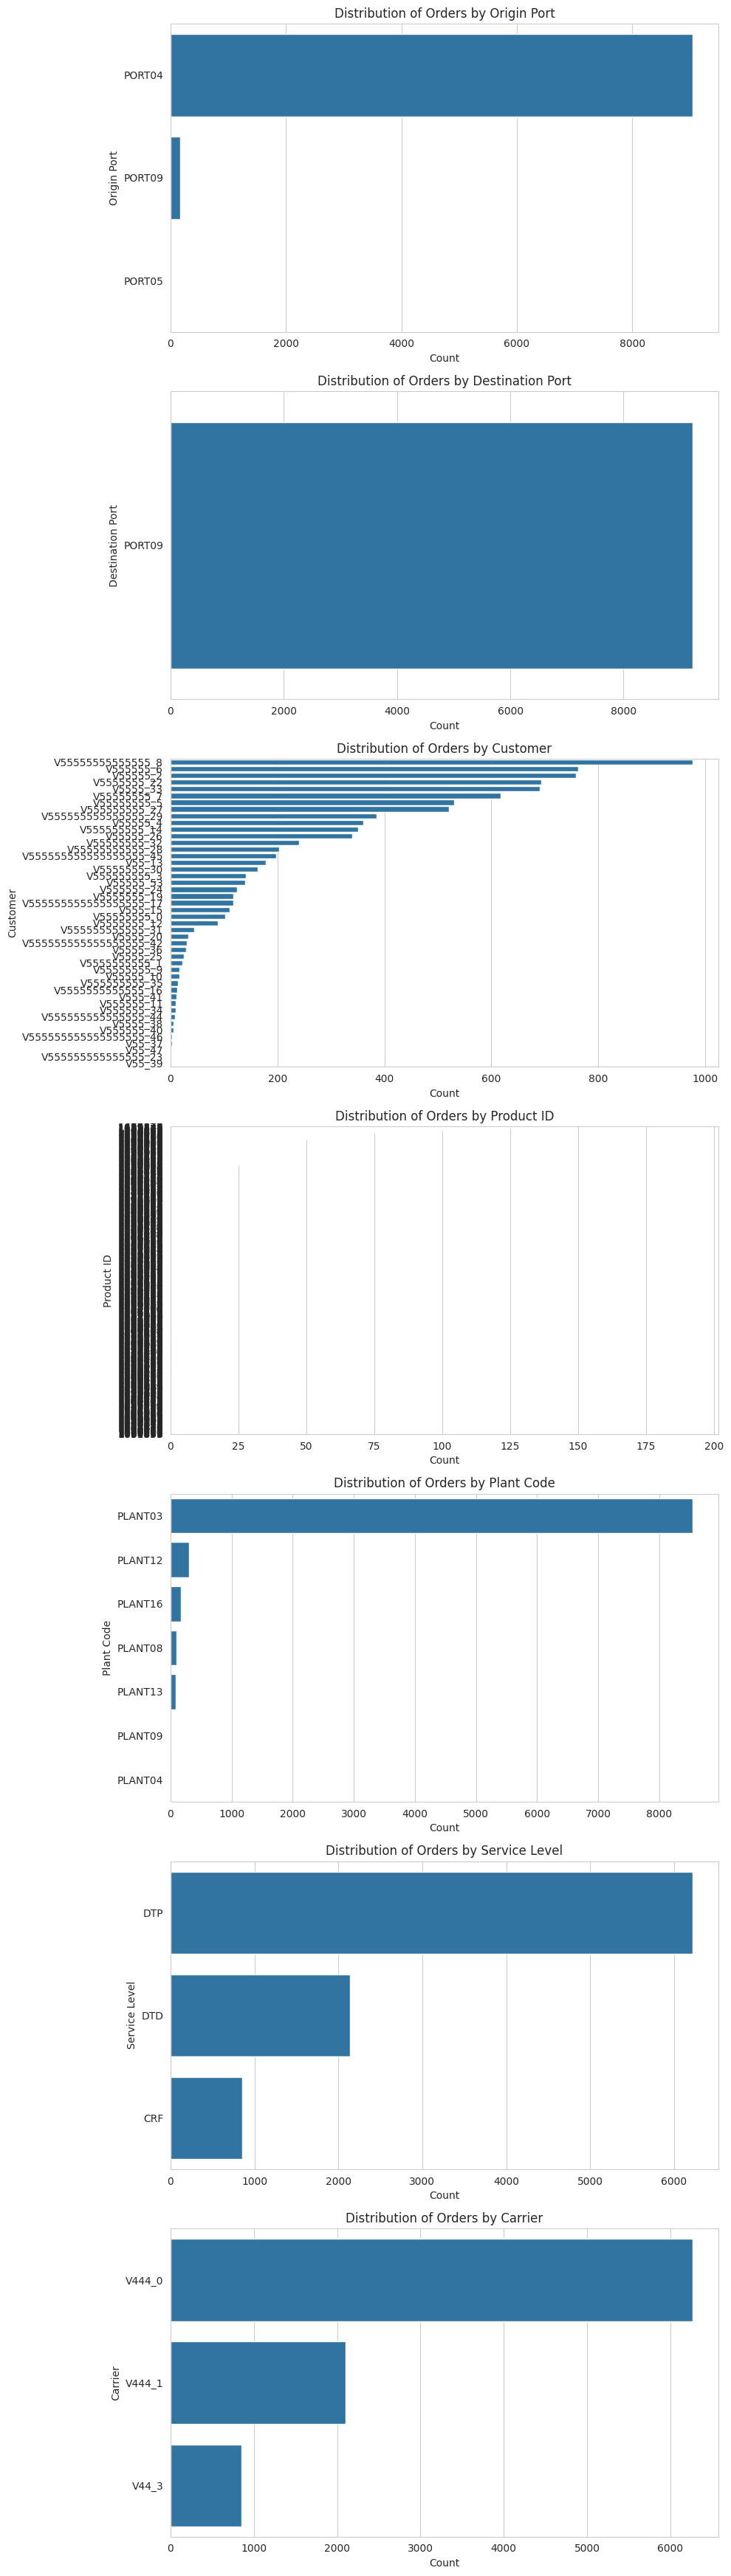

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") # Set the aesthetic style for the plots

# Analyze the distribution of orders by various categorical features
categorical_features = ['Origin Port', 'Destination Port', 'Customer', 'Product ID', 'Plant Code', 'Service Level', 'Carrier']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=order_list_df, y=feature, ax=axes[i], order=order_list_df[feature].value_counts().index)
    # Loop through each value from the `categorical_features` array
    axes[i].set_title(f'Distribution of Orders by {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

## Warehouse Analysis

In [14]:
print(wh_capacities_df.columns)

Index(['Plant ID', 'Daily Capacity '], dtype='object')


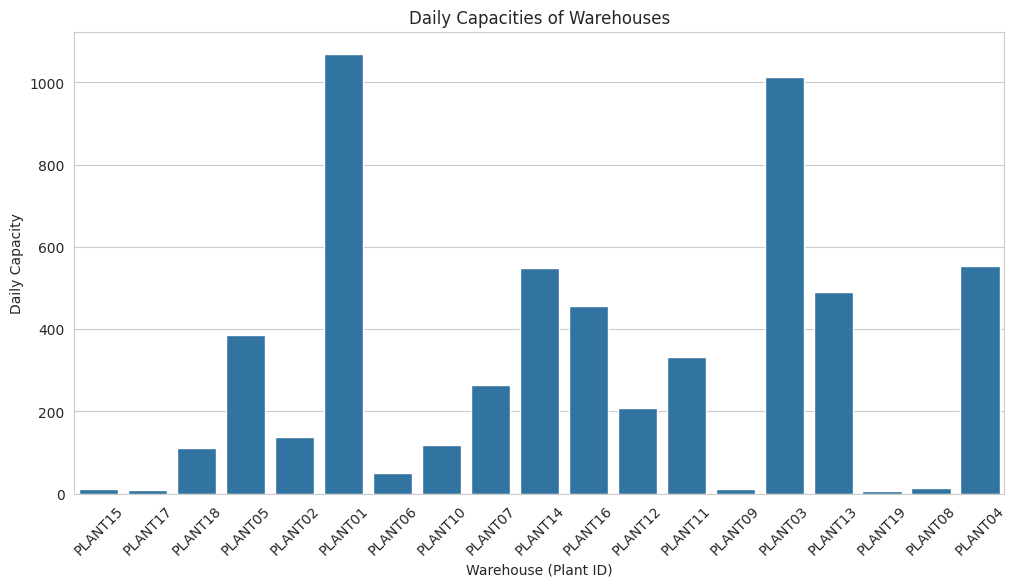

In [15]:
#wh_capacities_df.rename(columns={'Daily Capacity': 'Daily Capacity'}, inplace=True) # Correct the column name if needed

# Plot the capacities of each warehouse
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_capacities_df, x='Plant ID', y='Daily Capacity ') # Use the correct column name 'Daily Capacity'
plt.title('Daily Capacities of Warehouses')
plt.xlabel('Warehouse (Plant ID)')
plt.ylabel('Daily Capacity')
plt.xticks(rotation=45)
plt.show()

# Analyze distribution of products per plant
A plant is a factory where they take raw materials and turn it into the finished product.

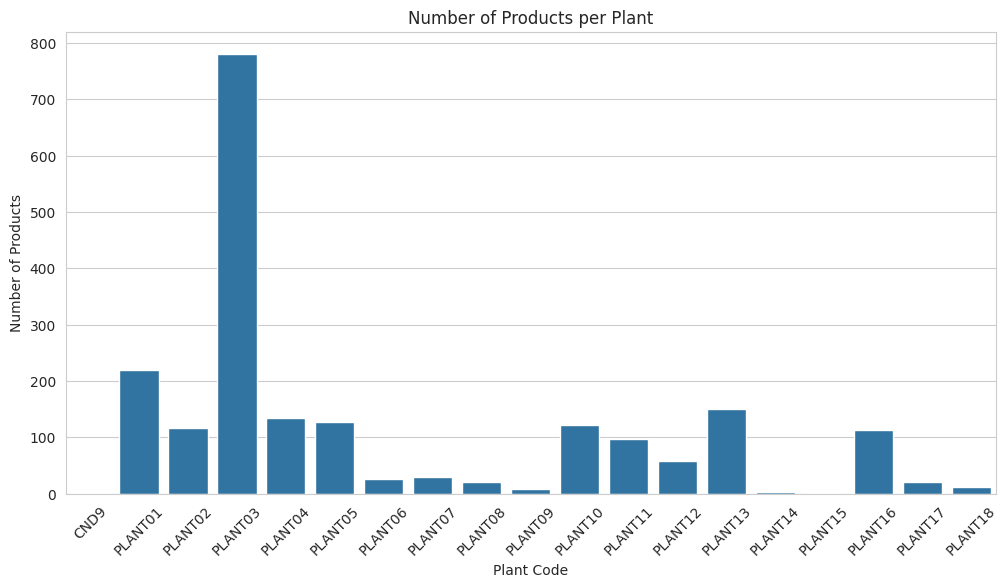

In [16]:
plt.figure(figsize=(12, 6))
products_count_per_plant = products_per_plant_df.groupby('Plant Code').count()
sns.barplot(x=products_count_per_plant.index, y=products_count_per_plant['Product ID'])
plt.title('Number of Products per Plant')
plt.xlabel('Plant Code')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

## Port and Transportation Analysis
Analyze freight rates by transportation mode and service level

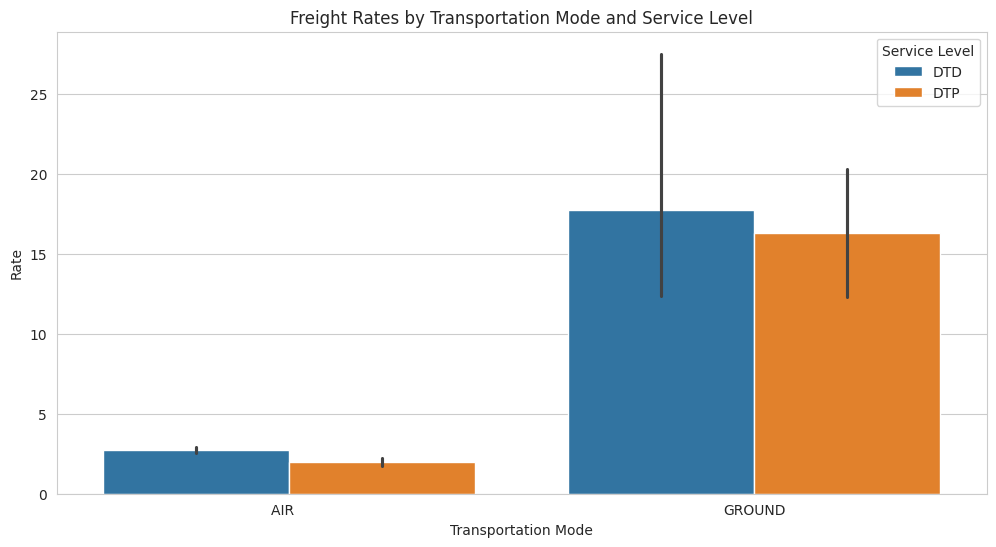

In [18]:
# Plot the freight rates by mode and service level
plt.figure(figsize=(12, 6))
# Create a barplot using the information from the `freight_rates_df` DataFrame
# Use `mode_dsc` data for x-axis and `rate` data for y-axis
sns.barplot(data=freight_rates_df, x='mode_dsc', y='rate', hue='svc_cd')
plt.title('Freight Rates by Transportation Mode and Service Level')
plt.xlabel('Transportation Mode')
plt.ylabel('Rate')
plt.legend(title='Service Level')
plt.show()

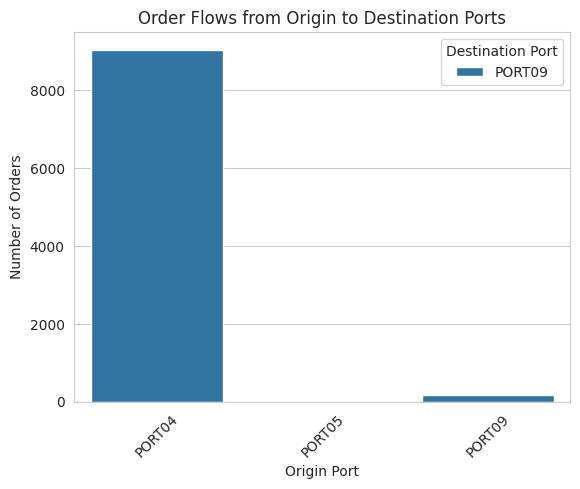

In [19]:
# Visualization of Order Flows from Origin to Destination Ports

# Use the data from `order_list_df` DataFrame
# Group orders that have the same origin and destination port
# Reset the series back into a DataFrame
order_flows = order_list_df.groupby(['Origin Port', 'Destination Port']).size().reset_index(name='Number of Orders')
sns.barplot(x='Origin Port', y='Number of Orders', hue='Destination Port', data=order_flows)
plt.title('Order Flows from Origin to Destination Ports')
plt.xlabel('Origin Port')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Destination Port')
plt.show()

## Transportation Modes Visualization

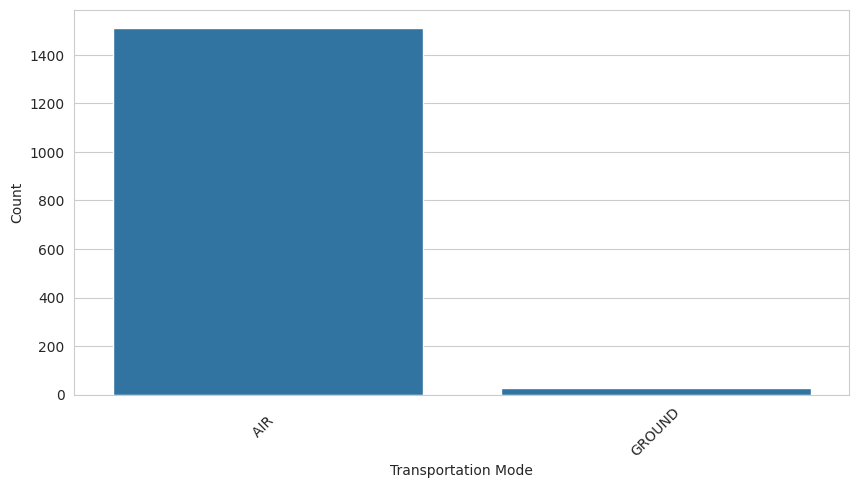

In [23]:
transport_modes = freight_rates_df.groupby('mode_dsc').size().reset_index(name='Count')
plt.figure(figsize=(10, 5))
sns.barplot(x='mode_dsc', y='Count', data=transport_modes)
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45) # Rotates our x-axis labels 45 degrees
plt.show()

## Visualization of Optimization Results (Simulated Data)

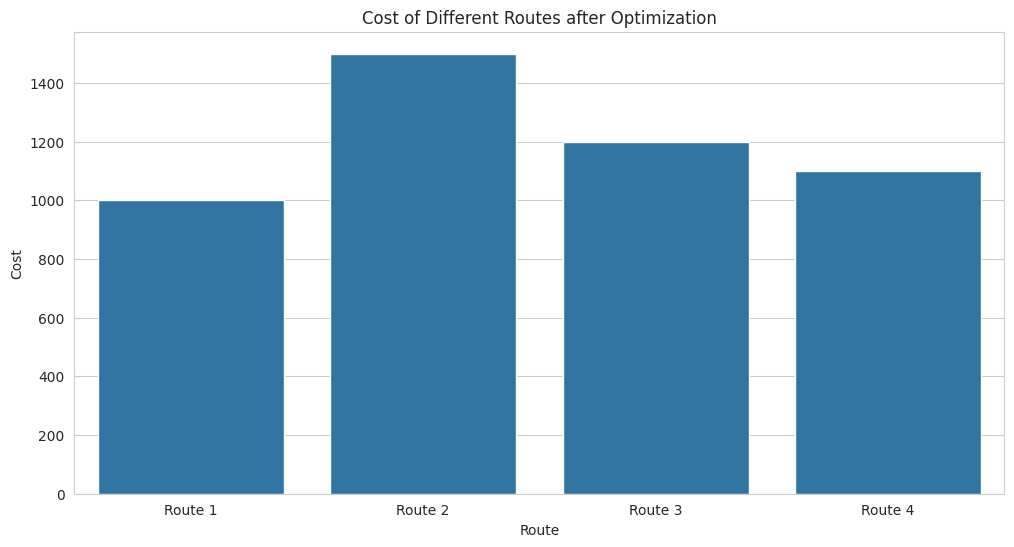

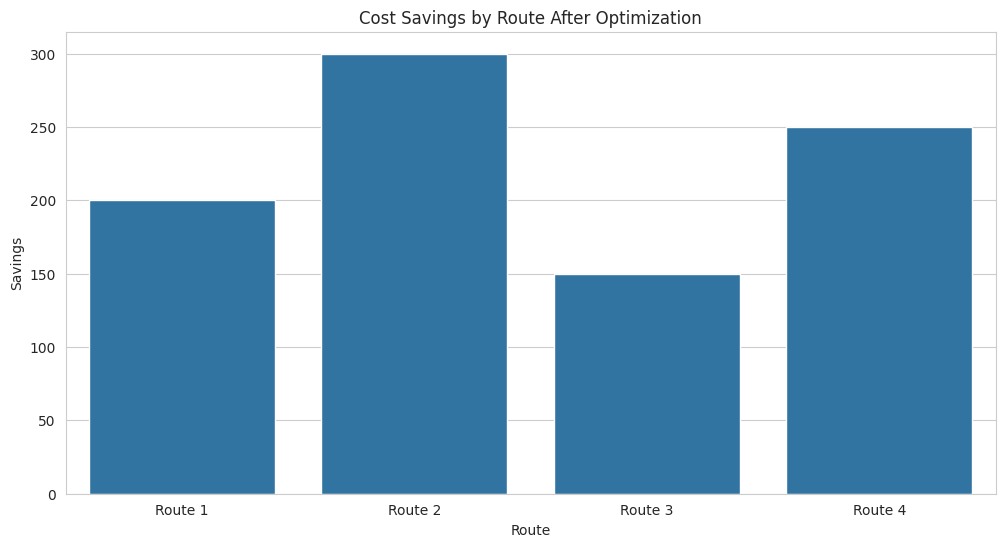

In [26]:
# Let's make a sample DataFrame called `optimization_results` with the following columns (Route, Cost, Savings)
optimization_results = pd.DataFrame({
    'Route': ['Route 1', 'Route 2', 'Route 3', 'Route 4'],
    'Cost': [1000, 1500, 1200, 1100],
    'Savings': [200, 300, 150, 250]
})

# Visualize cost of different routes in a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Route', y='Cost', data=optimization_results)
plt.title('Cost of Different Routes after Optimization')
plt.xlabel('Route')
plt.ylabel('Cost')
plt.show()

# Visualize cost savings by each route in a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Route', y='Savings', data=optimization_results)
plt.title('Cost Savings by Route After Optimization')
plt.xlabel('Route')
plt.ylabel('Savings')
plt.show()

## Analyze relationship between order characteristics and shipping costs

In [28]:
print(order_list_df.columns)

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')


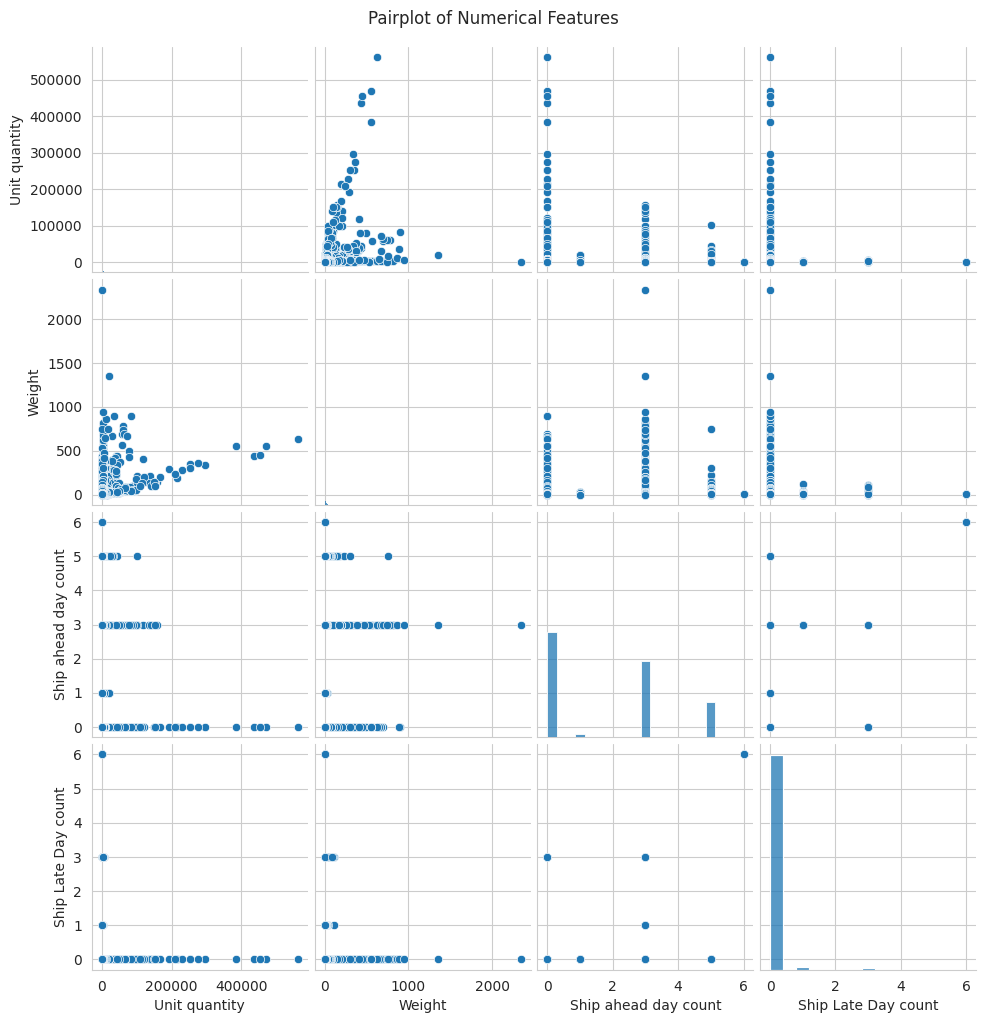

In [31]:
# Make sure the column names for `numerical_features` DataFrame match with the columns in the `order_list_df` DataFrame
numerical_features = ['Unit quantity', 'Weight', 'Ship ahead day count', 'Ship Late Day count']
sns.pairplot(order_list_df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()